In [1]:
from parser import Parser
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tsp import TspDrone

In [2]:
data = Parser("data/pcbouman-eur-TSP-D-Instances-8a6d795/uniform/uniform-12-n6.txt")

In [3]:
points = np.array([data.X, data.Y])

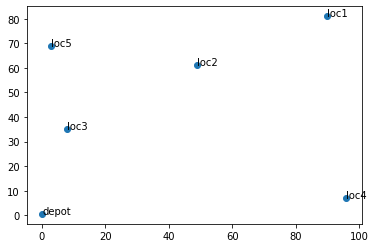

In [4]:
plt.plot(points[0], points[1], 'o')
for i, txt in enumerate(data.loc):
    plt.annotate(txt, (points[0][i], points[1][i]))

In [5]:
points_T = points.T

truck_dist =[]
for el in points_T:
    t = np.linalg.norm(el - points_T, axis=1)
    truck_dist.append(t.tolist())
truck_dist = np.array(truck_dist)

drone_dist = []
for el in points_T:
    d = np.linalg.norm(el - points_T, axis=1) * data.speed_of_drone
    drone_dist.append(d.tolist())
drone_dist = np.array(drone_dist)

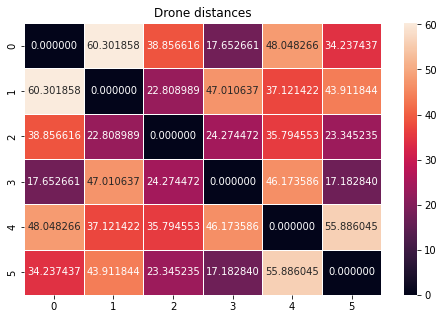

In [6]:
plt.figure(figsize = (8,5))
ax = sns.heatmap(drone_dist, linewidth=0.5, annot=True, fmt='f')
plt.title("Drone distances")
plt.show()

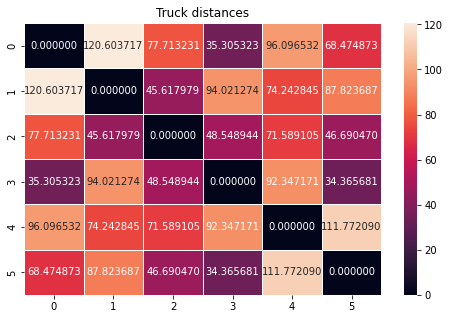

In [7]:
plt.figure(figsize = (8,5)); ax = sns.heatmap(truck_dist, linewidth=0.5, annot=True, fmt='f')
plt.title("Truck distances"); plt.show()

In [8]:
solution = np.array([[0, 4, 3, 2, 1, 5, 0],[1, 1, 0, 1, 0, 0, 1]])

In [9]:
solve = TspDrone(truck_dist, drone_dist)

In [10]:
score, road, road_type = solve.get_score(solution, return_road = True)
score

199.019610563928

In [11]:
road

[[0, 4], [0, 3], [4, 2], [3, 2], [2, 1], [2, 5], [1, 0], [5, 0]]

In [12]:
road_type

[1, 0, 1, 0, 1, 0, 1, 0]

In [13]:
points_T[road[0][0]]

array([0.11777149, 0.58581266])

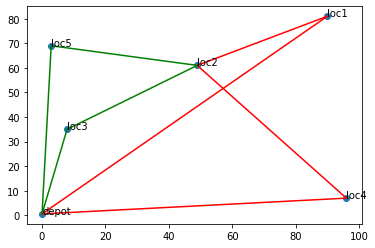

In [20]:
plt.figure()
plt.plot(points[0], points[1], 'o')

for el in range(len(road)):
    a = points_T[road[el][0]]
    b = points_T[road[el][1]]
    if road_type[el] == 1:
        plt.plot([a[0],b[0]], [a[1],b[1]], color="r")
    else:
        plt.plot([a[0],b[0]], [a[1],b[1]], color="g")

for i, txt in enumerate(data.loc):
    plt.annotate(txt, (points[0][i], points[1][i]))